In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from darts import TimeSeries

In [287]:
df = pd.read_csv("train.csv",parse_dates=True)
df.head(30)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [288]:
df.describe(include='all')

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
unique,1826,NaN,NaN,NaN
top,2013-01-01,NaN,NaN,NaN
freq,500,NaN,NaN,NaN
mean,NaN,5.500000,25.500000,52.250287
std,NaN,2.872283,14.430878,28.801144
min,NaN,1.000000,1.000000,0.000000
25%,NaN,3.000000,13.000000,30.000000
50%,NaN,5.500000,25.500000,47.000000
75%,NaN,8.000000,38.000000,70.000000


In [289]:
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d")
# y = df.set_index('date')
# y.plot(figsize=(15, 6))
# plt.show()

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [291]:
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total", "Percent"])
missing_data

,Total,Percent
date,0,0.0
store,0,0.0
item,0,0.0
sales,0,0.0


In [292]:
# fig, axes = plt.subplots(2, 1, figsize=(10, 16), sharex=True)

# for name, ax in zip(['sales'], axes):
#     sns.boxplot(data = df, x='Month', y=name, ax=ax)
#     ax.set_ylabel("")
#     ax.set_title(name)
#     if ax != axes[-1]:
#         ax.set_xlabel('')

In [293]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

seed = 404
np.random.seed(seed)
"Done"

'Done'

In [294]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import torch

from darts import concatenate
from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset, ElectricityDataset, MonthlyMilkDataset
from darts.metrics import mae, mape
from darts.models import (
    VARIMA,
    BlockRNNModel,
    NBEATSModel,
    RNNModel,
)
from darts.utils.callbacks import TFMProgressBar
from darts.utils.timeseries_generation import (
    datetime_attribute_timeseries,
    sine_timeseries,
)
logging.disable(logging.CRITICAL)

%matplotlib inline

In [295]:
# df['date'] = pd.to_datetime(df['date'])
# # print(df['date'].diff())
# df = df.dropna(subset=['date'])
# df = df.set_index('date').asfreq('D').reset_index()
# df['sales'] = df['sales'].interpolate()


In [296]:
# intervals = df['datetime'].diff().dt.days
# inconsistent = intervals[intervals != 1]  # Misalnya, jika interval harian, cari yang ≠ 1 hari
# intervals.unique()
# # inconsistent

In [297]:
df.head(3653)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
3648,2017-12-28,2,1,21
3649,2017-12-29,2,1,18
3650,2017-12-30,2,1,24
3651,2017-12-31,2,1,31


In [298]:
df = df.sort_values(by = 'date')


In [299]:
df['datetime'] = df['date'] + pd.to_timedelta(df.groupby('date').cumcount(), unit='m')
df.set_index('datetime', inplace=True)
df_month = df.select_dtypes(include='number').resample("ME").mean()
df_month

,store,item,sales
datetime,,,
2013-01-31,5.5,25.5,29.348645
2013-02-28,5.5,25.5,32.815500
2013-03-31,5.5,25.5,39.831097
2013-04-30,5.5,25.5,45.484933
2013-05-31,5.5,25.5,49.241419
2013-06-30,5.5,25.5,53.039800
2013-07-31,5.5,25.5,55.220774
2013-08-31,5.5,25.5,49.468452
2013-09-30,5.5,25.5,45.993800


In [302]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import torch

from darts import concatenate
from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset, ElectricityDataset, MonthlyMilkDataset
from darts.metrics import mae, mape
from darts.models import (
    VARIMA,
    BlockRNNModel,
    NBEATSModel,
    RNNModel,
)
from darts.utils.callbacks import TFMProgressBar
from darts.utils.timeseries_generation import (
    datetime_attribute_timeseries,
    sine_timeseries,
)
logging.disable(logging.CRITICAL)

%matplotlib inline

# for reproducibility
torch.manual_seed(1); np.random.seed(1)


def generate_torch_kwargs():
    # run torch models on CPU, and disable progress bars for all model stages except training.
    return { "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)], } }
"Done"

'Done'

In [316]:
sales_series = TimeSeries.from_dataframe(df_month, None, 'sales')
train_sales, test_sales = sales_series[:40], sales_series[40:]
model_store = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=200,
    random_state=0,
    **generate_torch_kwargs(),
)

model_store.fit(train_sales)
pred = model_store.predict(n=36)
print(f"MAPE = {mape(sales_series, pred):.2f}%")

Training: 0it [00:00, ?it/s]

MAPE = 2.58%


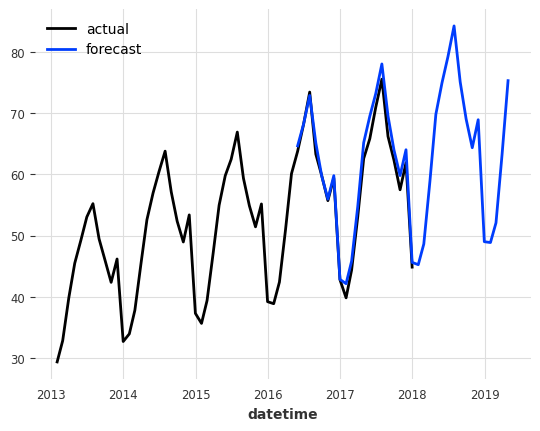

In [317]:
sales_series.plot(label="actual").figure
pred.plot(label="forecast").figure
plt.legend(); plt.show()

In [318]:
print(f"MAPE = {mape(sales_series, pred):.2f}%")

MAPE = 2.58%


In [ ]:
df.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
...            ...        ...    ...        ...
10    46    120601  66.046550   65.0  18.114991
      47     45204  24.755750   24.0   7.924820
      48    105570  57.814896   57.0  15.898538
      49     60317  33.032311   32.0  10.091610
      50    135192  74.037240   73.0  19.937566

[500 rows x 4 columns]

In [ ]:
# Agregasi penjualan berdasarkan tanggal
aggregated_df = df.groupby('date')['sales'].sum().reset_index()

# Pastikan data diurutkan berdasarkan tanggal
aggregated_df = aggregated_df.sort_values('date')

print(aggregated_df)


           date  sales
0    2013-01-01  13696
1    2013-01-02  13678
2    2013-01-03  14488
3    2013-01-04  15677
4    2013-01-05  16237
...         ...    ...
1821 2017-12-27  20378
1822 2017-12-28  21885
1823 2017-12-29  23535
1824 2017-12-30  24988
1825 2017-12-31  26420

[1826 rows x 2 columns]


In [ ]:
from darts import TimeSeries

# Konversi menjadi TimeSeries
series = TimeSeries.from_dataframe(aggregated_df, 'date', 'sales')

print(series)


<TimeSeries (DataArray) (date: 1826, component: 1, sample: 1)> Size: 15kB
array([[[13696.]],

       [[13678.]],

       [[14488.]],

       ...,

       [[23535.]],

       [[24988.]],

       [[26420.]]])
Coordinates:
  * date       (date) datetime64[ns] 15kB 2013-01-01 2013-01-02 ... 2017-12-31
  * component  (component) object 8B 'sales'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


C:\Users\renji\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


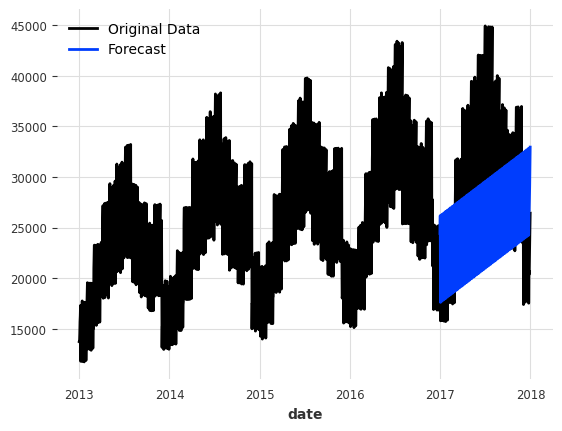

In [ ]:
from darts.models import ExponentialSmoothing

# Split data menjadi train dan validation
train, val = series.split_before(0.8)

# Inisialisasi model
model = ExponentialSmoothing()

# Train model
model.fit(train)

# Prediksi untuk data validasi
forecast = model.predict(len(val))

# Plot hasil
series.plot(label="Original Data")
forecast.plot(label="Forecast")
plt.show()

<Axes: xlabel='date'>

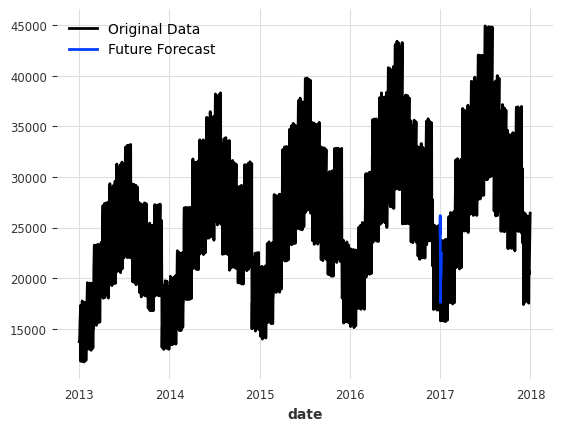

In [ ]:
# Prediksi 7 hari ke depan
future_forecast = model.predict(7)

# Plot hasil prediksi
series.plot(label="Original Data")
future_forecast.plot(label="Future Forecast")


In [ ]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# Loop untuk setiap grup
forecasts = {}

for (store, item), group in grouped_data:
    # Sort data berdasarkan tanggal
    group = group.sort_values('date')
    
    # Buat time series
    series = TimeSeries.from_dataframe(group, 'date', 'sales')
    
    # Split data menjadi train dan validation
    train, val = series.split_before(0.8)
    
    # Inisialisasi model
    model = ExponentialSmoothing()
    
    # Fit model ke data train
    model.fit(train)
    
    # Prediksi untuk data validasi
    forecast = model.predict(len(val))
    
    # Simpan hasil forecasting
    forecasts[(store, item)] = forecast

    # Print hasil forecasting
    print(f"Forecast for Store {store}, Item {item}:")
    print(forecast)
# Grup data berdasarkan store dan item
grouped_data = df.groupby(['store', 'item'])

# Periksa hasil grup
for (store, item), group in grouped_data:
    print(f"Store: {store}, Item: {item}")
    print(group.head())


Store: 1, Item: 1
                          date  store  item  sales
datetime                                          
2013-01-01 00:00:00 2013-01-01      1     1     13
2013-01-02 03:19:00 2013-01-02      1     1     11
2013-01-03 01:02:00 2013-01-03      1     1     14
2013-01-04 06:01:00 2013-01-04      1     1     13
2013-01-05 04:51:00 2013-01-05      1     1     10
Store: 1, Item: 2
                          date  store  item  sales
datetime                                          
2013-01-01 02:47:00 2013-01-01      1     2     33
2013-01-02 00:44:00 2013-01-02      1     2     43
2013-01-03 03:26:00 2013-01-03      1     2     23
2013-01-04 02:14:00 2013-01-04      1     2     18
2013-01-05 02:08:00 2013-01-05      1     2     34
Store: 1, Item: 3
                          date  store  item  sales
datetime                                          
2013-01-01 03:01:00 2013-01-01      1     3     15
2013-01-02 04:57:00 2013-01-02      1     3     30
2013-01-03 06:00:00 2013-01-